In [1]:
%load_ext autoreload
%autoreload 1
%aimport main

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, ShuffleSplit
from sklearn.datasets import (
    load_iris,
    load_digits,
    make_moons,
    fetch_openml,
    make_circles,
)

from main import sample_fermat
from main import Bundle, BaseKDEClassifier, FermatKDEClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV


## Datasets disponibles

In [3]:

datasets_cache = "datasets-v2.pkl"
if not os.path.exists(datasets_cache):
    DATASETS = Bundle(
        circles=make_circles(n_samples=10000, noise=0.15, factor=0.5),
        moons=make_moons(n_samples=10000, noise=0.1),
        digits=load_digits(return_X_y=True),
        iris=load_iris(return_X_y=True),
        mnist=fetch_openml(
            "mnist_784", version=1, parser="auto", return_X_y=True, as_frame=False
        ),
    )
    with open(datasets_cache, "wb") as f:
        pickle.dump(DATASETS, f)
else:
    with open(datasets_cache, "rb") as f:
        DATASETS = pickle.load(f)

In [4]:
X, y = DATASETS.mnist
y = y.astype(int)
n_samples = 1000
sample_indices = np.random.randint(0, len(X), n_samples)
X, y = X[sample_indices], y[sample_indices]

In [8]:
pd.Series(y).value_counts()

7    109
5    109
2    104
6    103
3    102
1    101
0     98
9     94
8     92
4     88
Name: count, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1991
)

In [12]:
kn = KNeighborsClassifier().fit(X_train, y_train)

In [13]:
kn.score(X_test, y_test)

0.855

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
from 

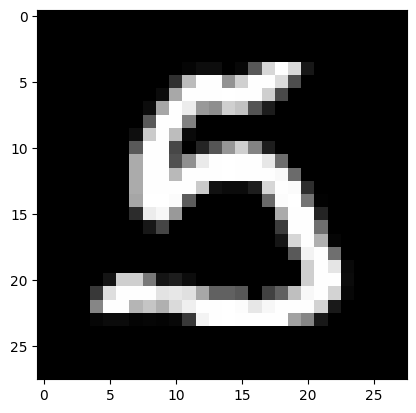

In [11]:
plt.imshow(X[332].reshape(28, 28), cmap="gray")

In [12]:
# Choosing train/test split by indices is equivalent to choosing rows themselves
SEED = 1991
np.random.seed(SEED)
idx_train, idx_test = train_test_split(np.arange(len(X)), test_size=0.8)
outer_cv = [(idx_train, idx_test)]
# outer_cv = ShuffleSplit(n_splits=1, test_size=0.8, random_state=SEED)
inner_folds = 5
inner_test_size = 0.5
inner_cv = ShuffleSplit(n_splits=inner_folds, test_size=inner_test_size)

In [13]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA()),
        ("clf", KNeighborsClassifier()),
    ]
)
# N, D = X.shape
# Ni = [len(X[y == i]) for i in np.unique(y)]
# K = len(np.unique(y))
pre_search_space = {
    "scaler": [StandardScaler(), "passthrough"],
    "pca": [*[PCA(ratio) for ratio in [0.8, 0.9, 0.95]], "passthrough"],
}

In [14]:
classifiers = Bundle(
    fkde=FermatKDEClassifier(),
    kde=BaseKDEClassifier(),
    gnb=GaussianNB(),
    kn=KNeighborsClassifier(),
    lgbm=LGBMClassifier(),
    lr=LogisticRegression(solver="saga"),
    svc=SVC(),
)
# max_neighbors = np.floor(min(Ni) * (1 - inner_test_size)).astype(int)


In [15]:
clf_search_space = {
    "kde": {"bandwidth": np.logspace(-2, 6, 101)},
    "fkde": (
        {
            "alpha": np.linspace(1, 2.5, 17),
            "bandwidth": np.logspace(-2, 6, 61),
        }
    ),
    "gnb": {"var_smoothing": np.logspace(-9, -1, 17)},
    "kn": {
        "n_neighbors": np.linspace(1, 200, dtype=int),
        "weights": ["uniform", "distance"],
    },
    "svc": {
        "C": np.logspace(-4, 3, 21),
        "gamma": np.logspace(-4, 2, 21),
        "kernel": ["linear", "rbf", "sigmoid"],  # excluding 'poly' which sometimes takes forever to finish
    },
    "lr": {
        "C": np.logspace(-4, 4, 20),
        "penalty": ["elasticnet"],
        "l1_ratio": np.linspace(0, 1, 20),
    },
    "lgbm": {
        "n_estimators": [50, 200, 500],
        "learning_rate": np.logspace(-4, -2, 5),
        "num_leaves": [3, 5, 8],
        "reg_alpha": np.logspace(-3, -1, 3),
        "reg_lambda": np.logspace(-3, -1, 3),
        "colsample_bytree": [1/3, 1/2],
    },
}

In [16]:
search_spaces = {
    name: {
        **pre_search_space,
        "clf": [clf],
        **{f"clf__{k}": v for k, v in clf_search_space[name].items()},
    }
    for name, clf in classifiers.items()
}

In [21]:
# !pip install seaborn

In [17]:
from eyeglasses import eyeglasses

In [19]:
eye = eyeglasses()

In [29]:
eye[:5,0]

array([-0.55380699, -1.47348284, -0.97075645, -1.33447909, -0.71831057])

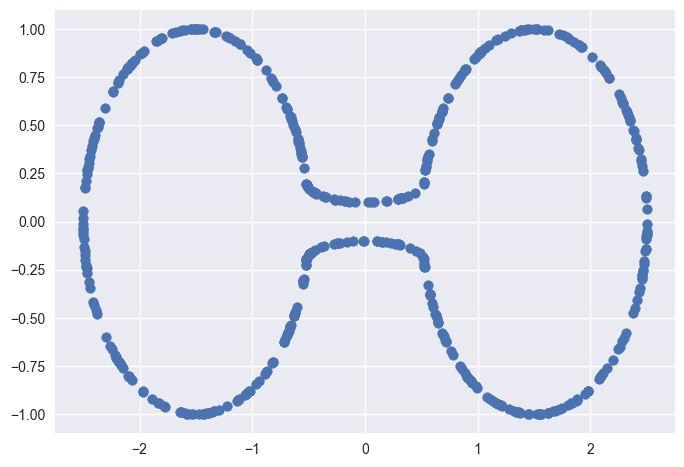

In [30]:
plt.scatter(eye[:,0], eye[:,1])

In [15]:
from matplotlib import pyplot as plt

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']